#### 回帰問題/線形モデル ####

##### L1正则化／L2正则化  <br>
参考链接：https://blog.csdn.net/jinping_shi/article/details/52433975

1. 定义 <br>
一般的损失函数后面会添加一个额外项，常用的额外项一般有两种， L1正则化 和 L2正则化，或者 L1范数 和 L2范数<br>
L1正则化和L2正则化可以看做是损失函数的惩罚项， 所谓『惩罚』是指对损失函数中的某些参数做一些限制<br>
对于线性回归模型，使用L1正则化的模型建叫做Lasso回归，使用L2正则化的模型叫做Ridge回归（岭回归）<br>
<br>
2. 表达式<br>
一般回归分析中，w表示特征的系数，从上式可以看到正则化项是对系数做了处理（限制）。在正则化项之前添加一个系数α，这个系数需要用户指定：<br>
L1正则化是指权值向量w中各个元素的绝对值之和，  ||w||	， α||w|| ->L1正则化项 <br>
L2正则化是指权值向量w中各个元素的平方和然后再求平方根， $w^{2}$ ， $αw^{2}$  ->L2正则化项 <br>

3. 不同作用<br>
L1正则化和L2正则化的作用：<br>
L1正则化可以产生稀疏权值矩阵，即产生一个稀疏模型，可以用于特征选择<br>
L2正则化可以防止模型过拟合（overfitting）,一定程度上，L1也可以防止过拟合<br>

In [1]:
import mglearn
import matplotlib.pyplot as plt

w[0]: 0.393906  b: -0.031804


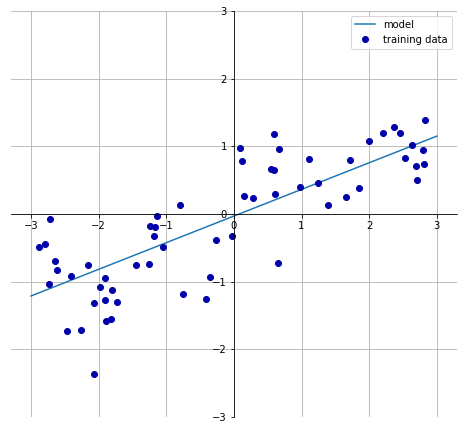

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
#最小二乗法 ordinary least squares:OLS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y= mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#適合不足
lr = LinearRegression().fit(X_train,y_train)
#lr.coef_ -> 重み（係数けいすう）
print("lr.coef_:{}".format(lr.coef_))
#lr.intercept_ ->　切片（オフセット）
print("lr.intercept_:{}".format(lr.intercept_))

print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(lr.score(X_test,y_test)))

lr.coef_:[ 0.39390555]
lr.intercept_:-0.031804343026759746
Training set score:0.67
Testing set score:0.66


In [4]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

#過剰適合
print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(lr.score(X_test,y_test)))


Training set score:0.95
Testing set score:0.61


In [5]:
#リッジ回帰　Ridge -> L２
from sklearn.linear_model import Ridge
#default　-> alpha=1.0
ridge = Ridge().fit(X_train,y_train)

print("Training set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(ridge.score(X_test,y_test)))

Training set score:0.89
Testing set score:0.75


In [6]:
alpha=10
ridge10 = Ridge(alpha=10).fit(X_train,y_train)

print("Training set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(ridge10.score(X_test,y_test)))

Training set score:0.79
Testing set score:0.64


In [7]:
alpha=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)

print("Training set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(ridge01.score(X_test,y_test)))

Training set score:0.93
Testing set score:0.77


In [8]:
#Lasso -> L1
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(lasso.score(X_test,y_test)))
#不为0的特征x系数的个数，即用到了几个特征
print("Number of features used:{}".format(np.sum(lasso.coef_!=0)))

Training set score:0.29
Testing set score:0.21
Number of features used:4


In [9]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(lasso001.score(X_test,y_test)))
#不为0的特征x系数的个数，即用到了几个特征
print("Number of features used:{}".format(np.sum(lasso001.coef_!=0)))

Training set score:0.90
Testing set score:0.77
Number of features used:33


In [10]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(lasso00001.score(X_test,y_test)))
#不为0的特征x系数的个数，即用到了几个特征
print("Number of features used:{}".format(np.sum(lasso00001.coef_!=0)))

Training set score:0.95
Testing set score:0.64
Number of features used:94


Text(0,0.5,'Coefficient magnitude')

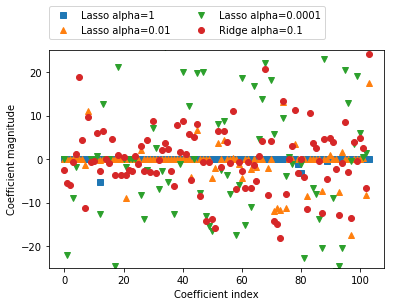

In [11]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")